In [ ]:
#hide
"""
  Installing python-pixabay only for the image dataset
  we are going to install everything in the drive and afther we going to export 
  our network
"""
!pip install python-pixabay
# Installing fastbook...
!pip install -Uqq fastbook
import fastbook
# Setting up the notebook...
fastbook.setup_book()

     |████████████████████████████████| 727kB 22.7MB/s 
     |████████████████████████████████| 51kB 9.5MB/s 
     |████████████████████████████████| 194kB 45.3MB/s 
     |████████████████████████████████| 51kB 9.1MB/s 
     |████████████████████████████████| 1.1MB 61.8MB/s 
     |████████████████████████████████| 92kB 11.3MB/s 
     |████████████████████████████████| 40kB 6.3MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 2.6MB 53.5MB/s 
Mounted at /content/gdrive


The pixabay library imported here is for search and download images, the groups thought it was a better option 

In [ ]:
#hide
# Importing fastai widgets for the website
from fastbook import *
from fastai.vision.widgets import *
import pixabay as pb

# The model

We're going to build a dog classifier. More specifically, we're going to make a neural net to distiguish between 5 types of dogs: golden retriever, doberman,pug,siberian husky and dachshund.

There are many images on the internet of each type of dog that we can use. We just need a way to find them and download them. We've provided a for this purpose, this is the pixabay API. Pixabay is a RESTful interface for searching and retrieving free images and videos released under the Pixabay License. The API returns JSON-encoded objects. Hash keys and values are case-sensitive and character encoding is in UTF-8. You can see more things related to this API [clicking here](https://pixabay.com/api/docs/).

# The code

In [ ]:
#hide
"""
  Here we can apply how many images we're going to search, this way 
  we can change any time here to improve our model
"""
how_many_imgs = 200

In [ ]:

#hide
"""
  Here we are going to get the key to use the pixabay api.
"""
key = os.environ.get('PIXABAY_API_SEARCH_KEY', '19128001-9843f0436ffeac86fb03959f0')

In [ ]:
key

'19128001-9843f0436ffeac86fb03959f0'

In [ ]:
#hide
"""
  This line create a image object from the pixabay api, within this object we can search in 
  the pixabay data bank for some images of dogs.
"""
pixabay_img = pb.Image(key)

# Searching 150 pictures of dogs
results = pixabay_img.search(q='dogs',per_page=150)
# Printing the first URL for the image
print(results['hits'][0]['previewURL'])
# Printing all the object
results['hits'][0]

https://cdn.pixabay.com/photo/2015/02/24/15/41/dog-647528_150.jpg


{'comments': 271,
 'downloads': 174361,
 'favorites': 1453,
 'id': 647528,
 'imageHeight': 2763,
 'imageSize': 3467200,
 'imageWidth': 4919,
 'largeImageURL': 'https://pixabay.com/get/50e4d246485ab108f5d0846096293e7f1737dee5524c704f752a73d7944cc550_1280.jpg',
 'likes': 1792,
 'pageURL': 'https://pixabay.com/illustrations/dog-wolf-yelp-moon-tree-night-647528/',
 'previewHeight': 84,
 'previewURL': 'https://cdn.pixabay.com/photo/2015/02/24/15/41/dog-647528_150.jpg',
 'previewWidth': 150,
 'tags': 'dog, wolf, yelp',
 'type': 'illustration',
 'user': 'Pezibear',
 'userImageURL': 'https://cdn.pixabay.com/user/2019/03/28/14-46-04-252_250x250.jpg',
 'user_id': 526143,
 'views': 706749,
 'webformatHeight': 359,
 'webformatURL': 'https://pixabay.com/get/50e4d246485ab10ff3d8992cc621367c1d3fdee44e507749702778d7964dcd_640.jpg',
 'webformatWidth': 640}

We've successfully downloaded the URLs of dogs. Let's look at one:

In [ ]:
#hide
dest = '/content/dog_teste.jpg'
download_url(results['hits'][0]['previewURL'], dest,True)

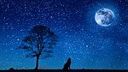

In [ ]:
#hide
im = Image.open(dest)
im.to_thumb(128,128)

This seems to have worked nicely, now we are going to use fastai's `download_images` to download all the URLs for each of our search terms. We'll put each in a separate folder:

In [ ]:
#hide
dog_types = ['golden retriever','doberman','pug','siberian husky','dachshund']
path = Path('/content/dogs')

In [ ]:
#hide
"""
  If the path already exists we simply delete everything and create the folders for 
  all the dogs DataSet
"""
if path.exists():
  for dir in path.iterdir():
    for file_item in dir.iterdir():
      os.remove(file_item)
    dir.rmdir()
  path.rmdir()

if not path.exists():
    path.mkdir()
    for dog_item in dog_types:
        dest = (path/dog_item)
        dest.mkdir(exist_ok=True)
        """
          Here we search for all the images of a especific dog type and we use it 
          to download all the images to the directory
        """
        results = pixabay_img.search(q=dog_item,per_page=how_many_imgs,image_type='photo',category='animals')
        download_images(dest, urls=[url['previewURL'] for url in results['hits']])

Our folder has image files, as we'd expect:

In [ ]:
fns = get_image_files(path)
fns

(#943) [Path('/content/dogs/doberman/00000065.jpg'),Path('/content/dogs/doberman/00000090.jpg'),Path('/content/dogs/doberman/00000190.jpg'),Path('/content/dogs/doberman/00000047.jpg'),Path('/content/dogs/doberman/00000054.jpg'),Path('/content/dogs/doberman/00000160.jpg'),Path('/content/dogs/doberman/00000018.jpg'),Path('/content/dogs/doberman/00000148.jpg'),Path('/content/dogs/doberman/00000079.jpg'),Path('/content/dogs/doberman/00000050.jpg')...]

Often when we download files from the internet, there are a few that are corrupt. Let's check:

In [ ]:
failed = verify_images(fns)
failed

(#0) []

Here, we won't got any corrupted image, but if we had we could simply use the mapTo remove all the failed images, you can use `unlink` on each of them. Note that, like most fastai functions that return a collection, `verify_images` returns an object of type `L`, which includes the `map` method. This calls the passed function on each element of the collection:

In [ ]:
failed.map(Path.unlink);

Now that we have downloaded some data, we need to assemble it in a format suitable for model training. In fastai, that means creating an object called `DataLoaders`.

In [ ]:
#hide 

""""
  Here we simply create the DataBlock for the dogs
  than we use this to create the DataLoader

  we are going to use the default get_items and the default get_y for our data set

  we also are going to pick 20% of our data set to be a validation set randomly
"""
dogs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = dogs.dataloaders(path)

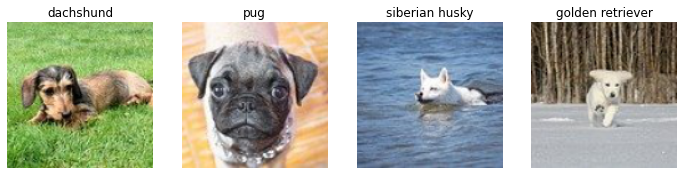

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

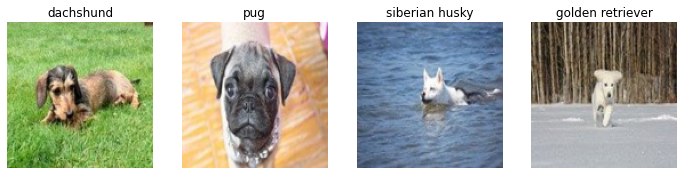

In [ ]:
#hide 

"""
  Just showing the different methos of resize as the notebook
"""
dogs = dogs.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

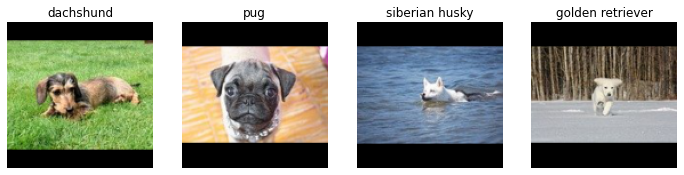

In [ ]:
#hide 

"""
  Just showing the different methos of resize as the notebook
"""

dogs = dogs.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

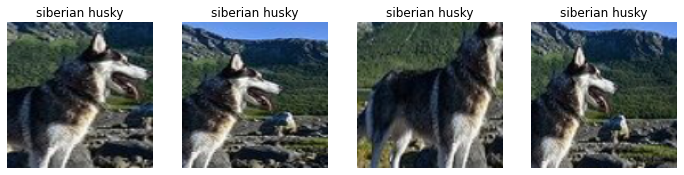

In [ ]:
#hide

"""
  Here is what we going to use, the RandomResizedCrop to see
  different parts of the image every epoch.
"""

dogs = dogs.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = dogs.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

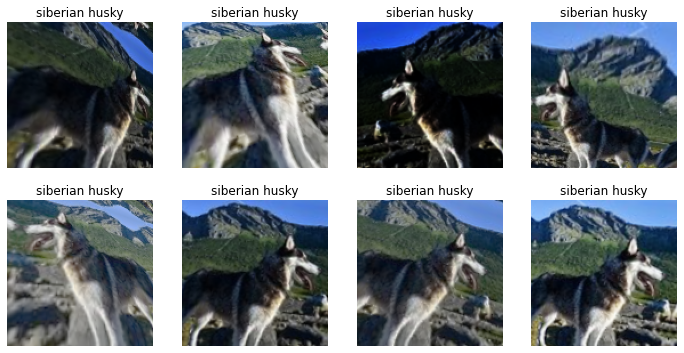

In [ ]:
#hide 

"""
  Just showing the aug_transforms the same as the book to show a general 
  case of the Data augmentation using the aug_transform
"""

dogs = dogs.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = dogs.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## The Classifier

In [ ]:
#hide
"""
  Now we are using the RandomResizedCrop as said before with the standard size for image classification
"""

dogs = dogs.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = dogs.dataloaders(path)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.208884,1.070256,0.372340,00:05


epoch,train_loss,valid_loss,error_rate,time
0,1.184181,0.627596,0.234043,00:06
1,0.938903,0.402028,0.127660,00:06
2,0.794712,0.378913,0.132979,00:06


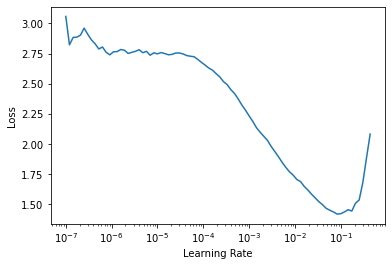

In [ ]:

#hide
"""
  Now we are creating our new classifier using the reset34 and the DataLoader that we create before

  Here we are using also the technique from the chapter 5

  We are trying to find a good lear rate to the model, using the section The Learning Rate Finder.
  We can do that by analysing the graphic. We can see that around 5e-4 we begin to have a steady deacrese of the loss, so this can be our base_lr. 
"""
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()
learn.fine_tune(2, base_lr=5e-4)

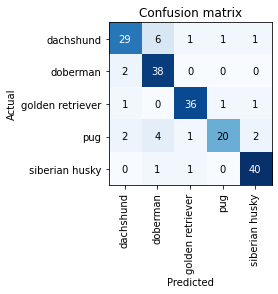

In [ ]:
#hide

"""
  Now we are going to see with the confusion matrix how our model was in the training 
"""

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

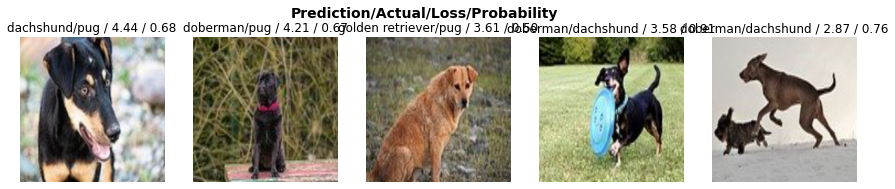

In [ ]:
#hide

"""
  Here we only show the top losses by our model
  In this model we have some trobles to distinguish between dobermans and dachshunds
"""
interp.plot_top_losses(5, nrows=1)

In [ ]:
#hide_output
""""
  Here we call the cleanerto see if we can improve the model by removing or change the data used to train the network
"""
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#hide
# Cleaning...
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## Turning Your Model into an Online Application

In [ ]:
#hide
"""
  Here we are creating the export for our learner for production
"""

learn.export()

In [ ]:
#hide
"""
  Just checking if the export file was created
"""
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('project.pkl')]

In [ ]:
#hide
"""
  This is how we going to call the model from inference on the web application
"""
learn_inf = load_learner(path/'project.pkl')

In [ ]:
#hide
"""
  This is how we call the predict from inference
"""
learn_inf.predict('/content/dogs/dachshund/00000000.jpg')

('dachshund',
 TensorImage(0),
 TensorImage([9.8368e-01, 1.0957e-02, 6.9920e-04, 4.0121e-03, 6.5050e-04]))

In [ ]:
#hide
"""
  The vocabulary from DataLoader
"""
learn_inf.dls.vocab

['dachshund', 'doberman', 'golden retriever', 'pug', 'siberian husky']

### Creating a Notebook App from the Model

Here we are going to use the model server/client build with the Anvil you can see the web application following this link : [Dogs Predictor](https://phtevvud4uc7aljt.anvil.app/G2VEA5BCEHIEKLJJUMY3DZQ4).

The web application works this way : we created a new notebook [App](https://colab.research.google.com/drive/1emk5NKLv78HvTOsyhGc5uXDgNHnaKOKX?usp=sharing) that onlys work for the website, the notebook needs the `project.pkl` file that is our network when you will run the project, remember to put this file otherwise the cells will raise a error. The App notebook only downloads a image for a given url and call the prediction from the leaner inference. 
All the widgets used these are provided by the Anvil site then we just pick the link on the input box and we return the prediction for the application. On the client side the asnwer is written on a label and the user can make any querys as he like.
